<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Ukraine_Russia_War.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/filename.csv')
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1531829232350920704,1531829232350920704,2022-06-01 02:45:23 UTC,2022-06-01,02:45:23,0,1068720816311943168,ssatlj,SSATLJeff,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1531829226772516864,1531829226772516864,2022-06-01 02:45:22 UTC,2022-06-01,02:45:22,0,1308073817143730177,xtremeserversuk,Xtreme Servers,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1531829223374979072,1531829223374979072,2022-06-01 02:45:21 UTC,2022-06-01,02:45:21,0,881604271,naashonomics,naashonomics,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1531829215993241603,1531829215993241603,2022-06-01 02:45:19 UTC,2022-06-01,02:45:19,0,22255728,yougottavote,YouGottaVote,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1531829215456546816,1531392525814190081,2022-06-01 02:45:19 UTC,2022-06-01,02:45:19,0,1439931600,fen34271017,フェンリルの尻尾,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'POTUS', 'name': 'President B...",NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
data = data[['username','tweet','language']]

In [ ]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [ ]:
data['language'].value_counts()

en     8847
pt      492
und     171
it      126
in       95
ru       36
fi       33
es       32
ca       26
ja       20
tl       13
ar       12
hi        9
uk        9
fr        9
de        8
ro        8
cy        7
zh        7
ur        6
nl        6
ta        4
no        3
et        3
cs        3
th        3
da        2
ko        2
mr        1
te        1
lv        1
sv        1
pl        1
bg        1
tr        1
hu        1
Name: language, dtype: int64

In [ ]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


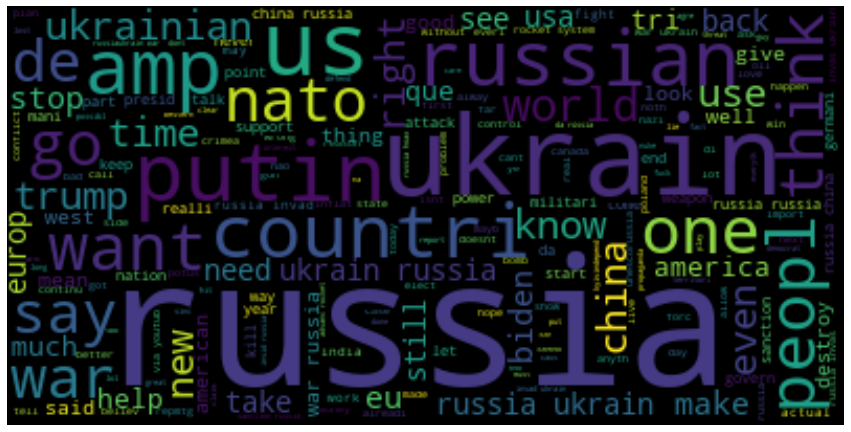

In [ ]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['tweet']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['tweet']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['tweet']]
data = data[['tweet', 'Positive','Negative','Neutral']]
data.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,tweet,Positive,Negative,Neutral
0,cant wait see joebiden podium zelenskyy europe...,0.000,0.000,1.000
1,euro truck simul heart russia expans cancel b...,0.000,0.182,0.818
2,pakistan buy russia oil india china srilanka b...,0.000,0.000,1.000
3,qatar realli replac russia germani gas supplie...,0.000,0.000,1.000
4,potus joebiden weak russia sell class missil ...,0.061,0.183,0.756


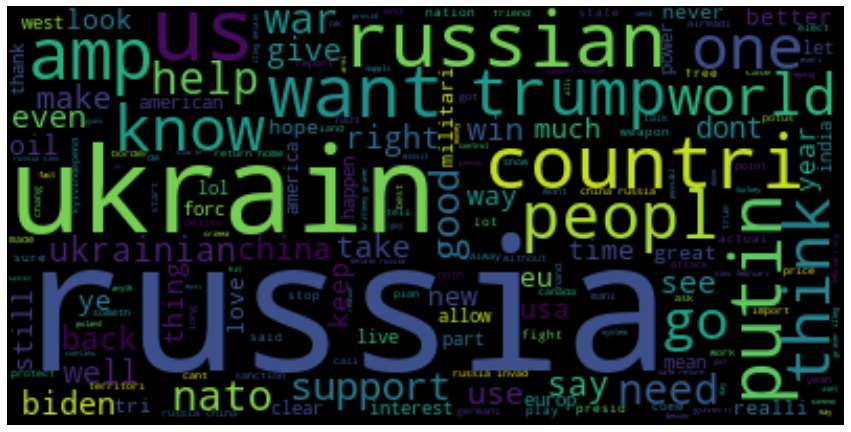

In [ ]:
positive = ' '.join([i for i in data['tweet'][data['Positive'] > data['Negative']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

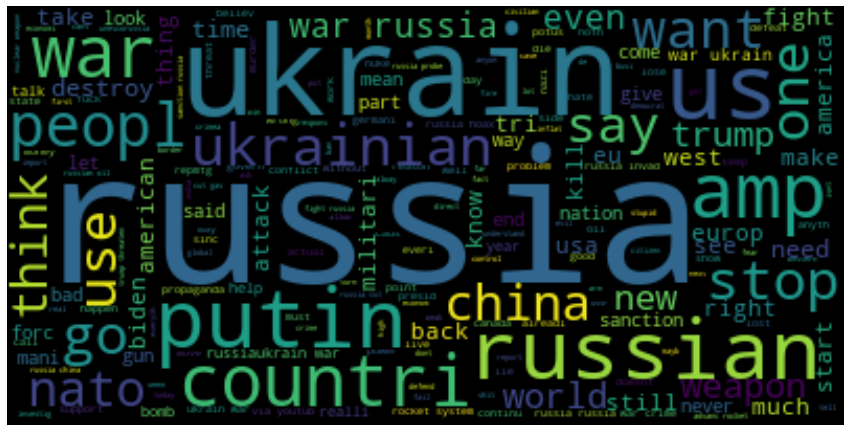

In [ ]:
negative = ' '.join([i for i in data['tweet'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()